In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [109]:
df_test=pd.read_csv("/content/drive/MyDrive/Facebook Prophet/DailyDelhiClimateTest.csv")
df_train=pd.read_csv("/content/drive/MyDrive/Facebook Prophet/DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [110]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


# Uni-Variate Forecasting

In [111]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])


In [112]:
model = Prophet() #instantiate Prophet
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [113]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''


future_data = model.make_future_dataframe(periods=113, freq = 'D')

forecast_data = model.predict(future_data)
  
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.550322,3.425650,3.667759
1571,2017-04-21,3.554083,3.425253,3.675784
1572,2017-04-22,3.554354,3.428722,3.680482
1573,2017-04-23,3.553715,3.428880,3.671699
1574,2017-04-24,3.570974,3.456680,3.699810


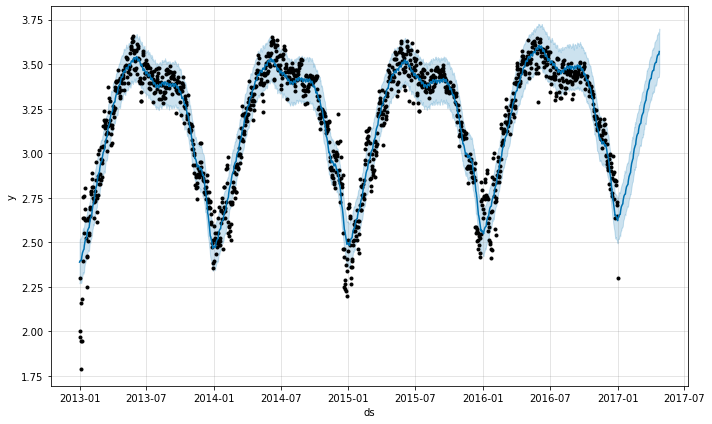

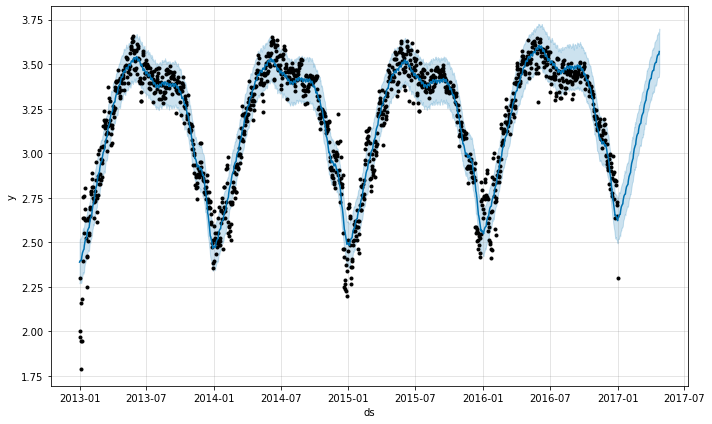

In [114]:
model.plot(forecast_data)

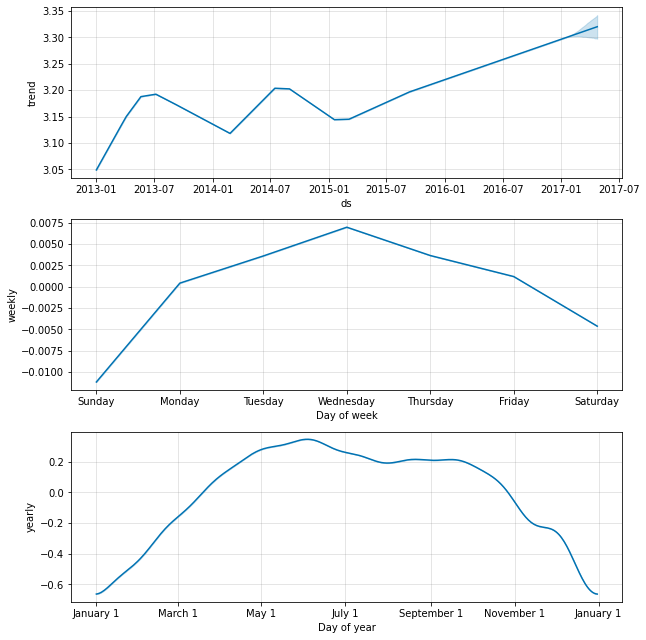

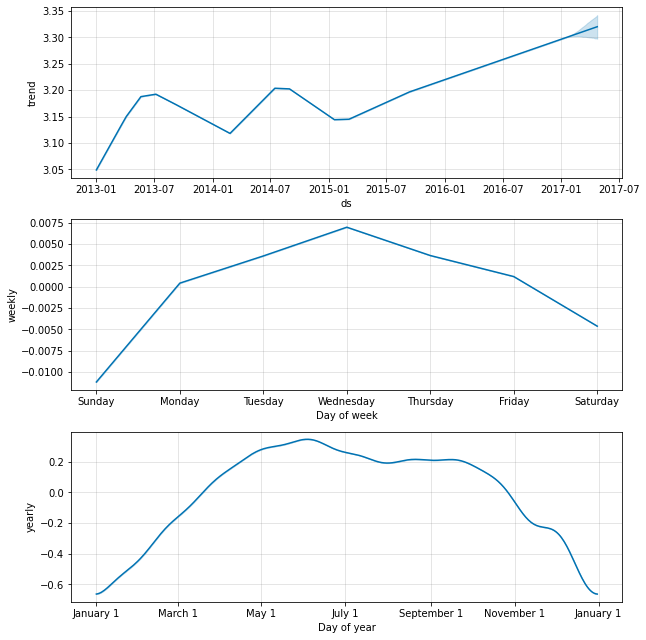

In [115]:
model.plot_components(forecast_data)

In [116]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

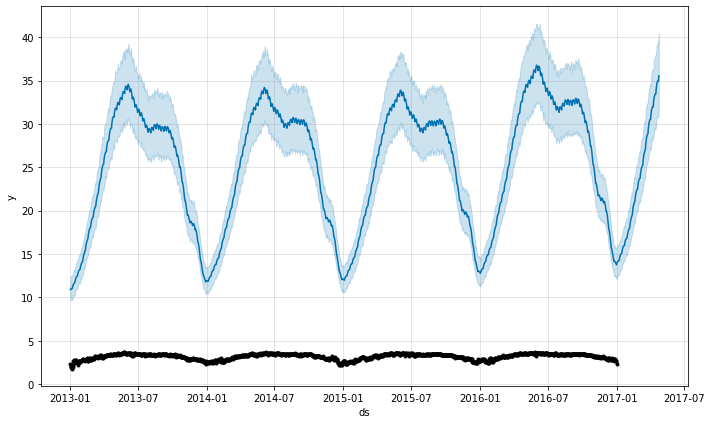

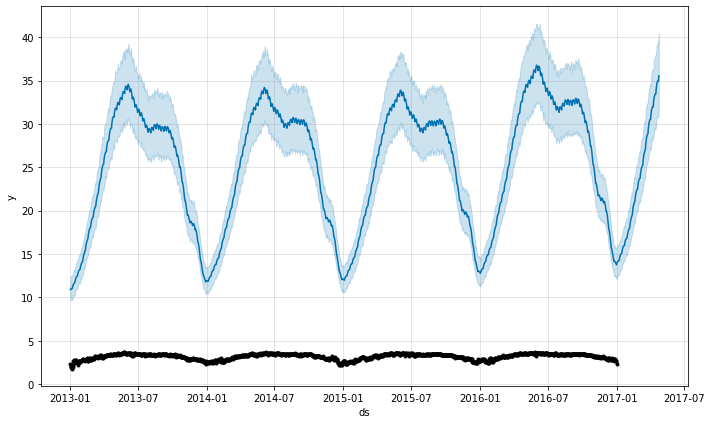

In [117]:
model.plot(forecast_data_orig)

In [118]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [120]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [17]:
df_test.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [27]:
final_df.tail(113)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2017-01-31,3.302740,15.325320,19.688702,3.300442,3.303712,-0.446102,-0.446102,-0.446102,0.003591,0.003591,0.003591,-0.449694,-0.449694,-0.449694,0.0,0.0,0.0,17.402907
1463,2017-02-28,3.308600,20.480452,26.132136,3.300379,3.314106,-0.165277,-0.165277,-0.165277,0.003591,0.003591,0.003591,-0.168869,-0.168869,-0.168869,0.0,0.0,0.0,23.180766
1464,2017-03-31,3.315089,27.004480,34.423941,3.297739,3.327777,0.101672,0.101672,0.101672,0.001182,0.001182,0.001182,0.100490,0.100490,0.100490,0.0,0.0,0.0,30.470548
1465,2017-04-30,3.321368,31.957182,40.748762,3.293106,3.342269,0.266292,0.266292,0.266292,-0.011161,-0.011161,-0.011161,0.277453,0.277453,0.277453,0.0,0.0,0.0,36.149397
1466,2017-05-31,3.327857,34.681744,44.962534,3.288901,3.360046,0.352080,0.352080,0.352080,0.006958,0.006958,0.006958,0.345122,0.345122,0.345122,0.0,0.0,0.0,39.643886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2026-01-31,3.990734,0.436564,1994.029873,-0.404024,8.099818,-0.456507,-0.456507,-0.456507,-0.004625,-0.004625,-0.004625,-0.451882,-0.451882,-0.451882,0.0,0.0,0.0,34.268513
1571,2026-02-28,3.996594,0.536810,2850.653378,-0.449181,8.124205,-0.175430,-0.175430,-0.175430,-0.004625,-0.004625,-0.004625,-0.170805,-0.170805,-0.170805,0.0,0.0,0.0,45.657356
1572,2026-03-31,4.003083,0.672125,4144.105992,-0.497177,8.198776,0.102267,0.102267,0.102267,0.003591,0.003591,0.003591,0.098675,0.098675,0.098675,0.0,0.0,0.0,60.663940
1573,2026-04-30,4.009362,0.769561,5218.277880,-0.537785,8.280685,0.280197,0.280197,0.280197,0.003643,0.003643,0.003643,0.276554,0.276554,0.276554,0.0,0.0,0.0,72.934334


In [33]:
rows = final_df["yhat"].tail(113)

In [37]:
rows = rows.reset_index()

In [40]:
rows.pop('index')

0      1462
1      1463
2      1464
3      1465
4      1466
       ... 
108    1570
109    1571
110    1572
111    1573
112    1574
Name: index, Length: 113, dtype: int64

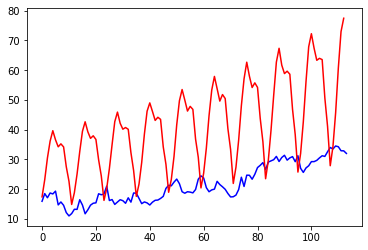

In [41]:
# plot

import matplotlib.pyplot as plt
plt.plot(df_test['meantemp'], color = 'blue')   
plt.plot(rows, color='red')
plt.show()

# Multi-Variate Forecasting

In [135]:
df_test=pd.read_csv("/content/drive/MyDrive/Facebook Prophet/DailyDelhiClimateTest.csv")
df_train=pd.read_csv("/content/drive/MyDrive/Facebook Prophet/DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [122]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])

model_new = Prophet() #instantiate Prophet
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [123]:
model_new.fit(df_train)

''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model_new.make_future_dataframe(periods=113, freq = 'D')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [124]:
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [125]:
df=df.append(df_test)
df = df.rename(columns={'meantemp': 'y', 'date':'ds'})
future_data=df[['ds', 'humidity', 'wind_speed', 'meanpressure']]

In [126]:
future_data.head(5)

,ds,humidity,wind_speed,meanpressure
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000


In [127]:
forecast_data = model_new.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1571,2017-04-20,3.573540,3.462763,3.674489
1572,2017-04-21,3.522061,3.411133,3.637218
1573,2017-04-22,3.518002,3.406389,3.633333
1574,2017-04-23,3.577531,3.472302,3.690157
1575,2017-04-24,3.588423,3.479895,3.700581


In [128]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,humidity,humidity_lower,humidity_upper,meanpressure,meanpressure_lower,meanpressure_upper,weekly,weekly_lower,weekly_upper,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.042938,2.247827,2.458251,3.042938,3.042938,-0.687713,-0.687713,-0.687713,-0.102617,-0.102617,-0.102617,-0.112200,-0.112200,-0.112200,-0.000036,-0.000036,-0.000036,0.002662,0.002662,0.002662,0.009619,0.009619,0.009619,-0.587758,-0.587758,-0.587758,0.0,0.0,0.0,2.355225
1,2013-01-02,3.043962,2.209050,2.431260,3.043962,3.043962,-0.723280,-0.723280,-0.723280,-0.142312,-0.142312,-0.142312,-0.147664,-0.147664,-0.147664,-0.000052,-0.000052,-0.000052,0.003656,0.003656,0.003656,0.005405,0.005405,0.005405,-0.584625,-0.584625,-0.584625,0.0,0.0,0.0,2.320682
2,2013-01-03,3.044986,2.228269,2.448774,3.044986,3.044986,-0.702684,-0.702684,-0.702684,-0.121014,-0.121014,-0.121014,-0.124021,-0.124021,-0.124021,-0.000059,-0.000059,-0.000059,-0.001452,-0.001452,-0.001452,0.003067,0.003067,0.003067,-0.580218,-0.580218,-0.580218,0.0,0.0,0.0,2.342303
3,2013-01-04,3.046010,2.320840,2.540580,3.046010,3.046010,-0.616517,-0.616517,-0.616517,-0.042114,-0.042114,-0.042114,-0.049941,-0.049941,-0.049941,-0.000047,-0.000047,-0.000047,0.000282,0.000282,0.000282,0.007875,0.007875,0.007875,-0.574685,-0.574685,-0.574685,0.0,0.0,0.0,2.429493
4,2013-01-05,3.047034,2.246332,2.468315,3.047034,3.047034,-0.686035,-0.686035,-0.686035,-0.118889,-0.118889,-0.118889,-0.123233,-0.123233,-0.123233,-0.000042,-0.000042,-0.000042,0.001039,0.001039,0.001039,0.004387,0.004387,0.004387,-0.568185,-0.568185,-0.568185,0.0,0.0,0.0,2.360999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,3.308233,3.462763,3.674489,3.291166,3.323892,0.265308,0.265308,0.265308,0.159177,0.159177,0.159177,0.157326,0.157326,0.157326,0.000098,0.000098,0.000098,-0.001452,-0.001452,-0.001452,0.001753,0.001753,0.001753,0.107583,0.107583,0.107583,0.0,0.0,0.0,3.573540
1572,2017-04-21,3.308431,3.411133,3.637218,3.290989,3.324296,0.213630,0.213630,0.213630,0.101036,0.101036,0.101036,0.101175,0.101175,0.101175,0.000088,0.000088,0.000088,0.000282,0.000282,0.000282,-0.000227,-0.000227,-0.000227,0.112312,0.112312,0.112312,0.0,0.0,0.0,3.522061
1573,2017-04-22,3.308630,3.406389,3.633333,3.290904,3.324687,0.209372,0.209372,0.209372,0.091086,0.091086,0.091086,0.093964,0.093964,0.093964,0.000074,0.000074,0.000074,0.001039,0.001039,0.001039,-0.002952,-0.002952,-0.002952,0.117247,0.117247,0.117247,0.0,0.0,0.0,3.518002
1574,2017-04-23,3.308828,3.472302,3.690157,3.290878,3.325181,0.268703,0.268703,0.268703,0.152928,0.152928,0.152928,0.157326,0.157326,0.157326,0.000070,0.000070,0.000070,-0.006561,-0.006561,-0.006561,-0.004469,-0.004469,-0.004469,0.122337,0.122337,0.122337,0.0,0.0,0.0,3.577531


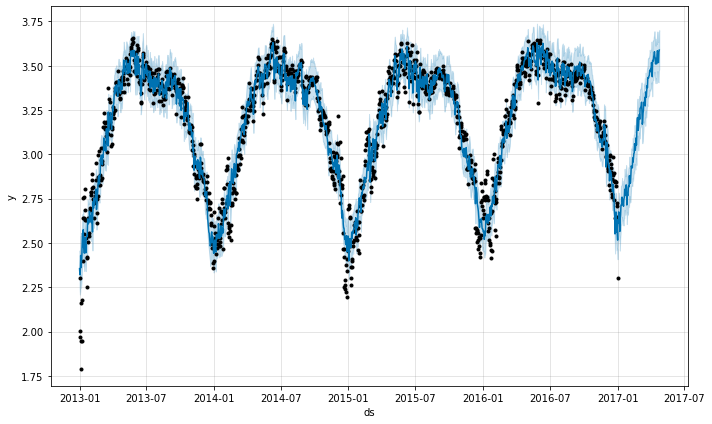

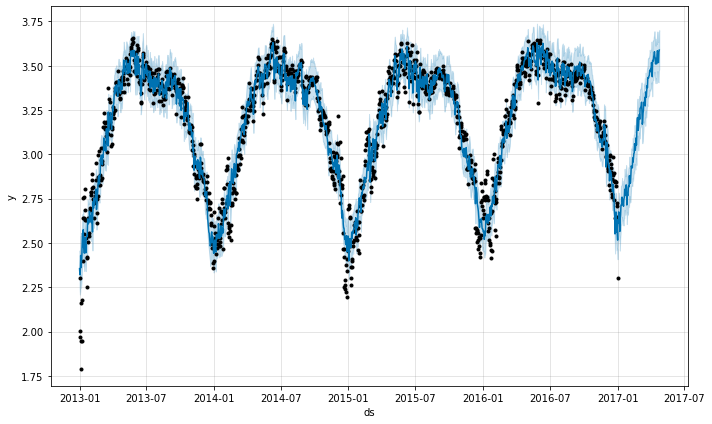

In [129]:
model_new.plot(forecast_data)

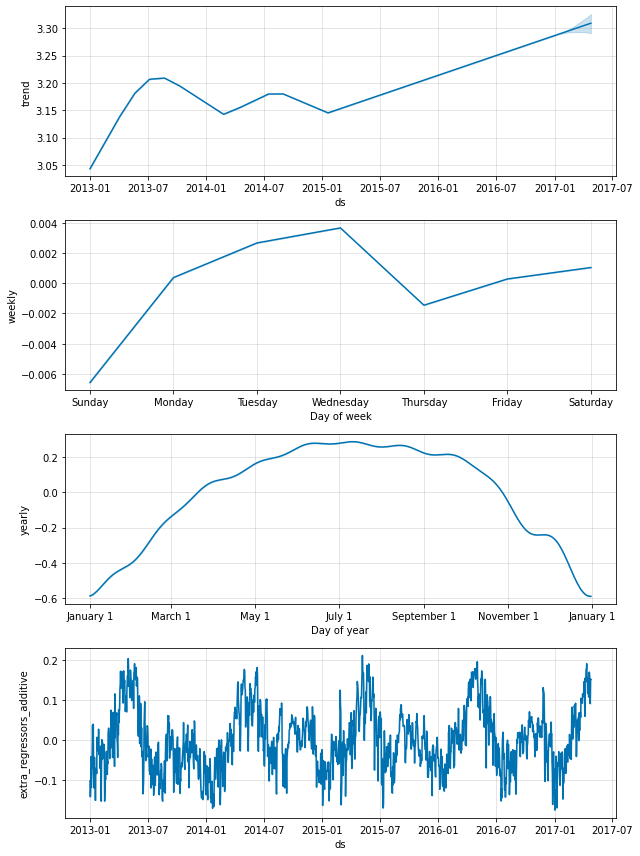

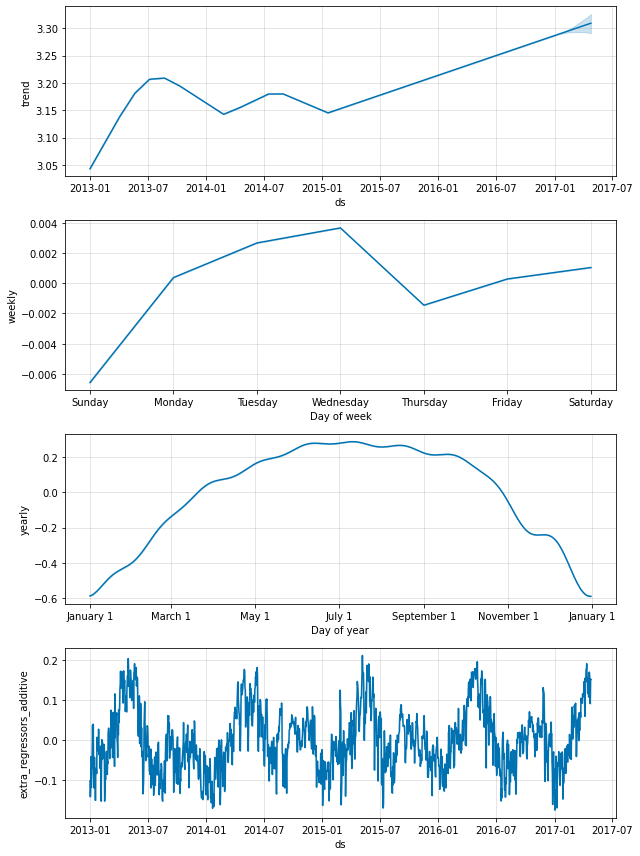

In [130]:
model_new.plot_components(forecast_data)

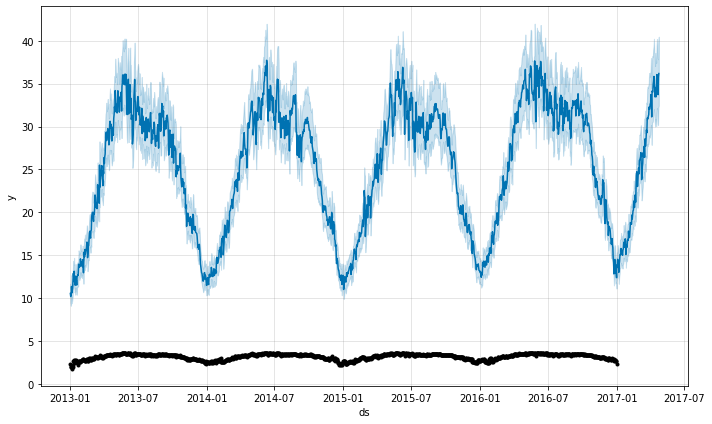

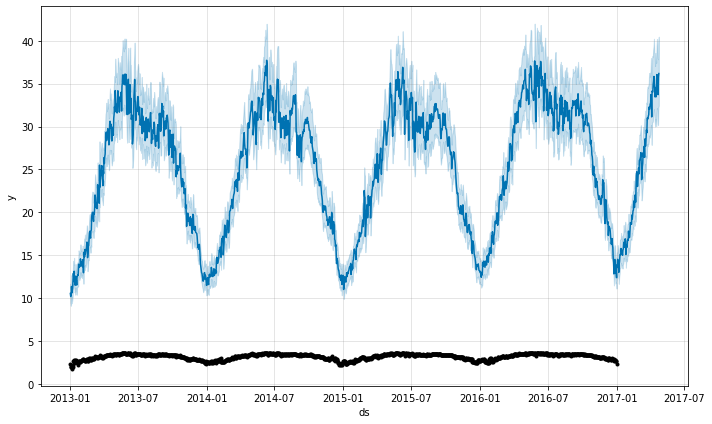

In [131]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [132]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [134]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'